* Name: Abhishek Doke
* Roll No: 13142
* Div & Batch: A - A2

Enter the edges (format: vertex1 vertex2):

Graph coloring solution (Backtracking): [0, 1, 2, 0, 1]


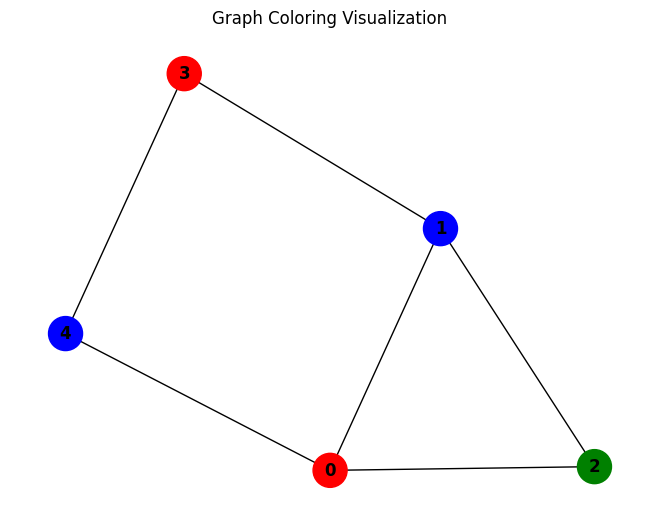

Enter the edges (format: vertex1 vertex2):

Graph coloring solution (Branch and Bound): [0, 1, 2, 0, 1]


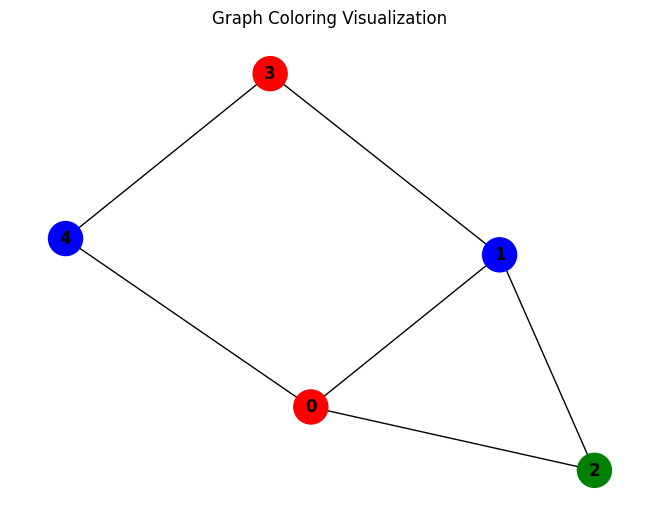

ValueError: invalid literal for int() with base 10: ''

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphColoring:
    def __init__(self, graph, num_colors):
        self.graph = graph  # The adjacency list representing the graph
        self.num_vertices = len(graph)  # Number of vertices
        self.num_colors = num_colors  # Number of available colors
        self.colors = [-1] * self.num_vertices  # -1 indicates no color assigned

    def is_safe(self, vertex, color):
        """Check if it's safe to assign the color to the vertex."""
        for neighbor in self.graph[vertex]:
            if self.colors[neighbor] == color:
                return False
        return True

    def backtrack(self, vertex):
        """Try to assign a color to the vertex and backtrack if needed."""
        if vertex == self.num_vertices:
            return True  # All vertices are colored

        for color in range(self.num_colors):
            if self.is_safe(vertex, color):
                self.colors[vertex] = color
                if self.backtrack(vertex + 1):
                    return True
                self.colors[vertex] = -1  # Backtrack

        return False

    def branch_and_bound(self, vertex, color_bound):
        """Branch and Bound approach with backtracking."""
        if vertex == self.num_vertices:
            return True  # All vertices are colored

        if color_bound >= self.num_colors:
            return False  # No further coloring is possible

        for color in range(self.num_colors):
            if self.is_safe(vertex, color):
                self.colors[vertex] = color
                if self.branch_and_bound(vertex + 1, color_bound):
                    return True
                self.colors[vertex] = -1  # Backtrack

        return False

    def solve(self, use_branch_and_bound=False):
        """Solve the graph coloring problem."""
        if use_branch_and_bound:
            if not self.branch_and_bound(0, 0):
                return None
        else:
            if not self.backtrack(0):
                return None

        return self.colors

    def visualize(self):
        """Visualize the graph with the assigned colors."""
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for i in range(self.num_vertices):
            for neighbor in self.graph[i]:
                G.add_edge(i, neighbor)

        # Generate distinct colors for plotting
        color_names = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'brown', 'gray']
        node_colors = [color_names[self.colors[i] % len(color_names)] for i in range(self.num_vertices)]

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=600, font_weight='bold')
        plt.title("Graph Coloring Visualization")
        plt.show()

def get_graph_from_user():
    """Function to get the graph from the user."""
    num_vertices = int(input("Enter the number of vertices: "))
    edges = int(input("Enter the number of edges: "))
    graph = [[] for _ in range(num_vertices)]
    print("Enter the edges (format: vertex1 vertex2):")
    for _ in range(edges):
        u, v = map(int, input().split())
        graph[u].append(v)
        graph[v].append(u)

    return graph, num_vertices

def main():
    graph, num_vertices = get_graph_from_user()
    num_colors = int(input("Enter the number of colors: "))

    graph_coloring = GraphColoring(graph, num_colors)

    method = input("Would you like to use Backtracking or Branch and Bound? (Enter 'backtracking' or 'branch_and_bound'): ").strip().lower()
    
    if method == "backtracking":
        solution = graph_coloring.solve(use_branch_and_bound=False)
        method_used = "Backtracking"
    elif method == "branch_and_bound":
        solution = graph_coloring.solve(use_branch_and_bound=True)
        method_used = "Branch and Bound"
    else:
        print("Invalid method. Please choose either 'backtracking' or 'branch_and_bound'.")
        return

    if solution:
        print(f"\nGraph coloring solution ({method_used}): {solution}")
        graph_coloring.visualize()
    else:
        print(f"No solution found using {method_used}.")

if __name__ == "__main__":
    while True:
        main()


Input
5
6
0 2
0 1
0 4
4 3
3 1
1 2